In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import os
import shutil


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 追記
import json
import datetime
import math
plt.style.use('dark_background')

# debug
#%pdb on

import pixiedust #%pixie_debugger



In [3]:
from sklearn import datasets

In [8]:
digits = datasets.load_digits()

print(digits.data)
print("次元：" , digits.data.ndim)
print(digits.data.shape)
print(digits.target)
digits.images[2]

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
次元： 2
(1797, 64)
[0 1 2 ... 8 9 8]


array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

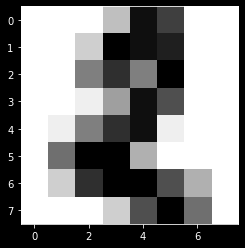

In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt

plt.imshow(digits.images[2], cmap=plt.cm.gray_r, interpolation = "nearest")
plt.show()

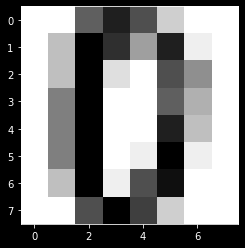

In [13]:
plt.imshow(digits.images[30], cmap=plt.cm.gray_r, interpolation = "nearest")


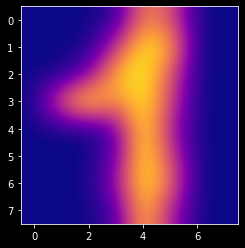

In [14]:
plt.imshow(digits.images[47], cmap = "plasma", interpolation = "bicubic")
plt.show()

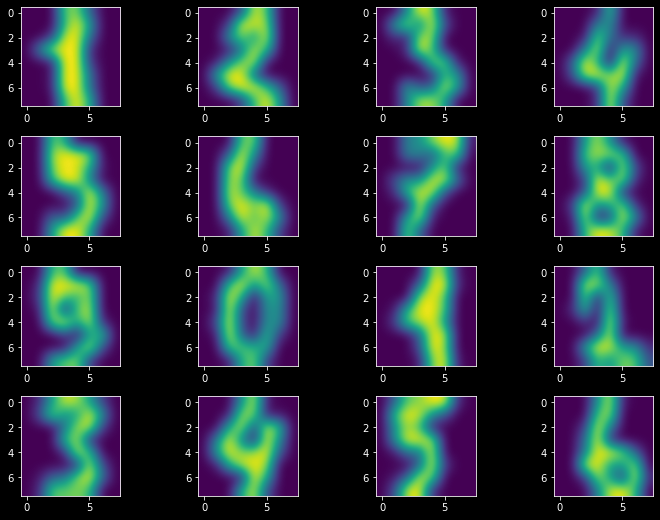

In [16]:
ROWS_COUNT = 4

COLUMNS_COUNT = 4

DIGIT_GRAPH_COUNT = ROWS_COUNT * COLUMNS_COUNT

subfig = []
x = np.linspace(-1, 1, 10)

fig = plt.figure(figsize = (12,9))

for i in range(1, DIGIT_GRAPH_COUNT + 1):
    subfig.append(fig.add_subplot(ROWS_COUNT, COLUMNS_COUNT, i))
    
    y = x**i
    subfig[i - 1].imshow(digits.images[i], interpolation = "bicubic", cmap = "viridis")

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

In [17]:
from sklearn import decomposition 
from mpl_toolkits.mplot3d import Axes3D

digits = datasets.load_digits()
all_features = digits.data
teacher_labels = digits.target





In [19]:
def getcolor (color):
    
    if color == 0:
        return "red"
    elif color == 1:
        return "orange"
    elif color == 2:
        return "yellow"
    elif color == 3:
        return "greenyellow"
    elif color == 4:
        return "green"
    elif color == 5:
        return "cyan"
    elif color == 6:
        return "blue"
    elif color == 7:
        return "navy"
    elif color == 8:
        return "purple"
    else:
        return "black"
    

In [20]:
pca = decomposition.PCA(n_components = 3)

three_features = pca.fit_transform(all_features)


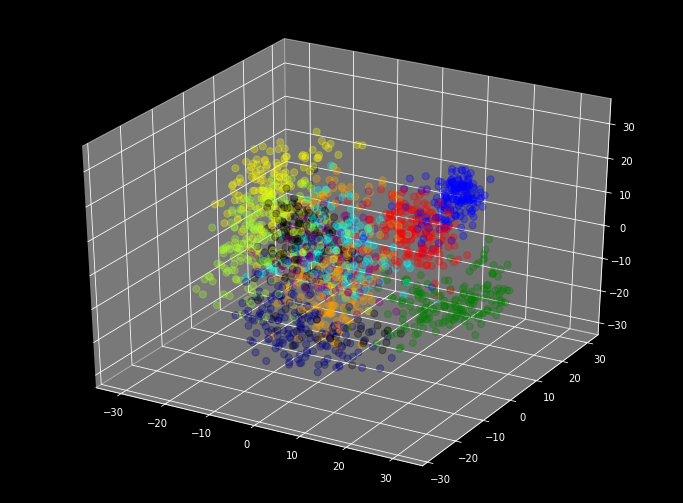

In [21]:
fig = plt.figure(figsize=(12,9))

subfig = fig.add_subplot(111, projection= "3d")

colors = list(map(getcolor, teacher_labels))

subfig.scatter(three_features[:, 0], three_features[:, 1] , three_features[:, 2], s=50, c=colors, alpha=0.3 )

plt.show()


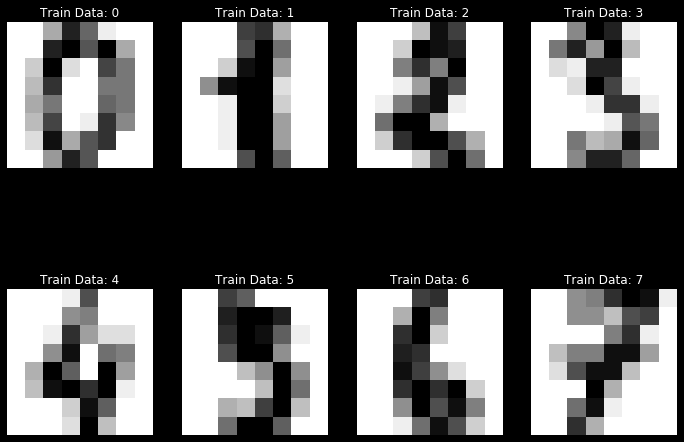

In [23]:
from sklearn import svm, metrics

images_and_labels = list(zip(digits.images, digits.target))

fig = plt.figure(figsize=(12,9))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2,4,index+1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("Train Data: %i" % label)


In [24]:
num_samples = len(digits.images)
print(num_samples)

1797


In [25]:
print(digits.images.shape)

(1797, 8, 8)


In [27]:
data = digits.images.reshape((num_samples, -1))
import sklearn.svm as svm
print(data.shape)

(1797, 64)


In [39]:
model = svm.SVC(gamma = 0.001)

train_features=data[: num_samples//2]
train_teacher_labels=digits.target[: num_samples//2]

test_feature = data[num_samples//2 : ]
test_teacher_labels=digits.target[num_samples//2 : ]

model.fit(train_features, train_teacher_labels)

expected = test_teacher_labels
predicted = model.predict(test_feature)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(("分類器が分類した結果 %s: \n %s \n ") % (model, classification_report(expected, predicted)))
print(("コンフュージョンマトリックス:\n %s ") % confusion_matrix(expected, predicted))

分類器が分類した結果 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False): 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

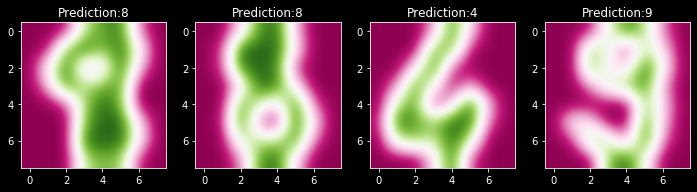

In [40]:
fig = plt.figure(figsize=(12, 9))

digits_and_predictions = list(zip(digits.images[num_samples//2 : ], predicted))

for index, (image, prediction) in enumerate(digits_and_predictions[:4]):
    plt.subplot(2,4,index + 5)
    plt.imshow(image, cmap="PiYG", interpolation="bicubic")
    plt.title("Prediction:%i" % prediction)
    
plt.show()
